In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import patsy # to build design matrix
import statsmodels.api as sm
import matplotlib.patches as mpatches

from paper_behavior_functions import (query_sessions_around_criterion,
                                      seaborn_style, institution_map,
                                      group_colors, figpath, EXAMPLE_MOUSE,
                                      FIGURE_WIDTH, FIGURE_HEIGHT,
                                      dj2pandas, plot_psychometric)
from pylab import cm

# Load some things from paper_behavior_functions
figpath = figpath()
seaborn_style()
pal = group_colors()
# Create an array with the colors you want to use
colors = [[0.8,0,0.2], [0.92,0.68,0.0353]]
# Set your custom color palette
customPalette = sns.set_palette(sns.color_palette(colors))

dataChip14 = pd.read_csv (r'ExperimentalDataChip14.csv')   #read the csv file (put 'r' before the path string to address any special characters in the path, such as '\'). Don't forget to put the file name at the end of the path + ".csv"
print (dataChip14)
simulationsChip14Hyper = pd.read_csv (r'SimulationsChip14Hyper.csv') 
simulationsChip14Normo = pd.read_csv (r'SimulationsChip14Normo.csv') 
predictionChip14 = pd.read_csv (r'PredictionChip14.csv')   #read the csv file (put 'r' before the path string to address any special characters in the path, such as '\'). Don't forget to put the file name at the end of the path + ".csv"
print (predictionChip14)
predictionsChip14Hyper = pd.read_csv (r'PredictionsChip14Hyper.csv')   #read the csv file (put 'r' before the path string to address any special characters in the path, such as '\'). Don't forget to put the file name at the end of the path + ".csv"
predictionsChip14Normo = pd.read_csv (r'PredictionsChip14Normo.csv')   #read the csv file (put 'r' before the path string to address any special characters in the

ImportError: cannot import name 'query_sessions_around_criterion' from 'paper_behavior_functions' (/Users/belen/Documents/Postdoc/Manuscripts/Insulin resistance/IR manuscript/Python codes/paper_behavior_functions.py)

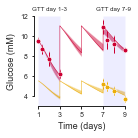

In [30]:
# Plot glucose Hypothesis 1

plt.close('all')

fig = sns.FacetGrid(data=dataChip14, hue="Glycemic_level", palette=customPalette,
                    sharex=True, sharey=True,
                    height=FIGURE_HEIGHT, aspect=(FIGURE_WIDTH/4)/FIGURE_HEIGHT)

#fig.map(plt.errorbar, "time_total", "Glucose_mean", "Glucose_SEM", fmt='none')
fig.map(plt.errorbar, "time_total", "Glucose_mean", "Glucose_SEM", fmt='none', elinewidth=1, capsize=0.5, capthick=0.3)
sns.lineplot(data=dataChip14,
             x='time_total', y='Glucose_mean', hue="Glycemic_level", marker='o', err_style='bars',
             color=customPalette, linewidth=0, ci=95, ax=fig.ax, legend=None)# overlay the simulated

fig.ax.fill_between(data=simulationsChip14Hyper, x='time_total', y1='H1_G_min', y2='H1_G_max', alpha=0.5, 
                    facecolor=colors[0])

fig.ax.fill_between(data=simulationsChip14Normo, x='time_total', y1='H1_G_min', y2='H1_G_max', alpha=0.5, 
                    facecolor=colors[1])

sns.lineplot(data=simulationsChip14Hyper,
             x='time_total', y='H1_G_opt', color=colors[0], linewidth=0.5, ax=fig.ax, legend=None)# overlay the simulated

sns.lineplot(data=simulationsChip14Normo,
             x='time_total', y='H1_G_opt', color=colors[1], linewidth=0.5, ax=fig.ax, legend=None)# overlay the simulated


rect1=mpatches.Rectangle((0,0),48,12, 
                        alpha=0.07,
                        facecolor='blue')
plt.gca().add_patch(rect1)

rect1=mpatches.Rectangle((144,0),48,12, 
                        alpha=0.07,
                        facecolor='blue')
plt.gca().add_patch(rect1)

# Add text to identify the GTTs

plt.text(24, 12.5, 'GTT day 1-3', horizontalalignment = 'center', fontsize = 'x-small')
plt.text(168, 12.5, 'GTT day 7-9', horizontalalignment = 'center', fontsize = 'x-small')


#plt.text(96, 14, 'H1:Calibration',
#         horizontalalignment='center',
#         fontsize=10)

fig.set_axis_labels('Time (days)', 'Glucose (mM)')
fig.ax.set_xticks([0,48,96,144,192])
fig.ax.set_ylim(3,12)
fig.ax.set_xticklabels(['1','3','5','7','9'])
fig.despine(trim=True)
plt.tight_layout(w_pad=-0.1)
fig.savefig(os.path.join(figpath, "GlucoseH1.pdf"))


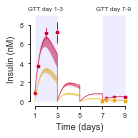

In [36]:
# Plot insulin Hypothesis 1

plt.close('all')

fig = sns.FacetGrid(data=dataChip14, hue="Glycemic_level", palette=customPalette,
                    sharex=True, sharey=True,
                    height=FIGURE_HEIGHT, aspect=(FIGURE_WIDTH/4)/FIGURE_HEIGHT)

#fig.map(plt.errorbar, "time_total", "Glucose_mean", "Glucose_SEM", fmt='none')
fig.map(plt.errorbar, "time_total", "Insulin_mean", "Insulin_SEM", fmt='none', elinewidth=1, capsize=0.5, capthick=0.3)
sns.lineplot(data=dataChip14,
             x='time_total', y='Insulin_mean', hue="Glycemic_level", marker='o', err_style='bars',
             color=customPalette, linewidth=0, ci=95, ax=fig.ax, legend=None)# overlay the simulated


fig.ax.fill_between(data=simulationsChip14Hyper, x='time_total', y1='H1_I_min', y2='H1_I_max', alpha=0.5, 
                    facecolor=colors[0])

fig.ax.fill_between(data=simulationsChip14Normo, x='time_total', y1='H1_I_min', y2='H1_I_max', alpha=0.5, 
                    facecolor=colors[1])
    
sns.lineplot(data=simulationsChip14Hyper,
             x='time_total', y='H1_I_opt', color=colors[0], linewidth=0.5, ax=fig.ax, legend=None)#over

sns.lineplot(data=simulationsChip14Normo,
             x='time_total', y='H1_I_opt', color=colors[1], linewidth=0.5, ax=fig.ax, legend=None)#over

rect1=mpatches.Rectangle((0,0),48,9, 
                        alpha=0.07,
                        facecolor='blue')
plt.gca().add_patch(rect1)

rect1=mpatches.Rectangle((144,0),48,9, 
                        alpha=0.07,
                        facecolor='blue')

plt.text(24, 9.5, 'GTT day 1-3', horizontalalignment = 'center', fontsize = 'x-small')
plt.text(168, 9.5, 'GTT day 7-9', horizontalalignment = 'center', fontsize = 'x-small')

plt.gca().add_patch(rect1)

fig.set_axis_labels('Time (days)', 'Insulin (nM)')
fig.ax.set_xticks([0,48,96,144,192])
fig.ax.set_xticklabels(['1','3','5','7','9'])
fig.despine(trim=True)
plt.tight_layout(w_pad=-0.1)
fig.savefig(os.path.join(figpath, "InsulinH1.pdf"))

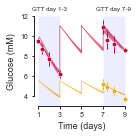

In [38]:
# Plot glucose Hypothesis 2

plt.close('all')

fig = sns.FacetGrid(data=dataChip14, hue="Glycemic_level", palette=customPalette,
                    sharex=True, sharey=True,
                    height=FIGURE_HEIGHT, aspect=(FIGURE_WIDTH/4)/FIGURE_HEIGHT)

#fig.map(plt.errorbar, "time_total", "Glucose_mean", "Glucose_SEM", fmt='none')
fig.map(plt.errorbar, "time_total", "Glucose_mean", "Glucose_SEM", fmt='none', elinewidth=1, capsize=0.5, capthick=0.3)
sns.lineplot(data=dataChip14,
             x='time_total', y='Glucose_mean', hue="Glycemic_level", marker='o', err_style='bars',
             color=customPalette, linewidth=0, ci=95, ax=fig.ax, legend=None)# overlay the simulated

fig.ax.fill_between(data=simulationsChip14Hyper, x='time_total', y1='H2_G_min', y2='H2_G_max', alpha=0.5, 
                    facecolor=colors[0])

fig.ax.fill_between(data=simulationsChip14Normo, x='time_total', y1='H2_G_min', y2='H2_G_max', alpha=0.5, 
                    facecolor=colors[1])

sns.lineplot(data=simulationsChip14Hyper,
             x='time_total', y='H2_G_opt', color=colors[0], linewidth=0.5, ax=fig.ax, legend=None)# overlay the simulated

sns.lineplot(data=simulationsChip14Normo,
             x='time_total', y='H2_G_opt', color=colors[1], linewidth=0.5, ax=fig.ax, legend=None)# overlay the simulated

rect1=mpatches.Rectangle((0,0),48,12, 
                        alpha=0.07,
                        facecolor='blue')
plt.gca().add_patch(rect1)

rect1=mpatches.Rectangle((144,0),48,12, 
                        alpha=0.07,
                        facecolor='blue')

plt.text(24, 12.5, 'GTT day 1-3', horizontalalignment = 'center', fontsize = 'x-small')
plt.text(168, 12.5, 'GTT day 7-9', horizontalalignment = 'center', fontsize = 'x-small')

plt.gca().add_patch(rect1)

fig.set_axis_labels('Time (days)', 'Glucose (mM)')
fig.ax.set_xticks([0,48,96,144,192])
fig.ax.set_xticklabels(['1','3','5','7','9'])
fig.ax.set_ylim(3,12)
fig.despine(trim=True)
plt.tight_layout(w_pad=-0.1)
fig.savefig(os.path.join(figpath, "GlucoseH2.pdf"))

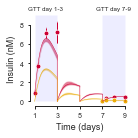

In [42]:
# Plot insulin Hypothesis 1

plt.close('all')

fig = sns.FacetGrid(data=dataChip14, hue="Glycemic_level", palette=customPalette,
                    sharex=True, sharey=True,
                    height=FIGURE_HEIGHT, aspect=(FIGURE_WIDTH/4)/FIGURE_HEIGHT)

#fig.map(plt.errorbar, "time_total", "Glucose_mean", "Glucose_SEM", fmt='none')
fig.map(plt.errorbar, "time_total", "Insulin_mean", "Insulin_SEM", fmt='none', elinewidth=1, capsize=0.5, capthick=0.3)
sns.lineplot(data=dataChip14,
             x='time_total', y='Insulin_mean', hue="Glycemic_level", marker='o', err_style='bars',
             color=customPalette, linewidth=0, ci=95, ax=fig.ax, legend=None)# overlay the simulated


fig.ax.fill_between(data=simulationsChip14Hyper, x='time_total', y1='H2_I_min', y2='H2_I_max', alpha=0.5, 
                    facecolor=colors[0])

fig.ax.fill_between(data=simulationsChip14Normo, x='time_total', y1='H2_I_min', y2='H2_I_max', alpha=0.5, 
                    facecolor=colors[1])
    
sns.lineplot(data=simulationsChip14Hyper,
             x='time_total', y='H2_I_opt', color=colors[0], linewidth=0.5, ax=fig.ax, legend=None)#over

sns.lineplot(data=simulationsChip14Normo,
             x='time_total', y='H2_I_opt', color=colors[1], linewidth=0.5, ax=fig.ax, legend=None)#over

rect1=mpatches.Rectangle((0,0),48,9, 
                        alpha=0.07,
                        facecolor='blue')
plt.gca().add_patch(rect1)

rect1=mpatches.Rectangle((144,0),48,9, 
                        alpha=0.07,
                        facecolor='blue')
plt.gca().add_patch(rect1)

plt.text(24, 9.5, 'GTT day 1-3', horizontalalignment = 'center', fontsize = 'x-small')
plt.text(168, 9.5, 'GTT day 7-9', horizontalalignment = 'center', fontsize = 'x-small')


fig.set_axis_labels('Time (days)', 'Insulin (nM)')
fig.ax.set_xticks([0,48,96,144,192])
fig.ax.set_yticks([0,2,4,6,8])
fig.ax.set_xticklabels(['1','3','5','7','9'])
fig.despine(trim=True)
plt.tight_layout(w_pad=-0.1)
fig.savefig(os.path.join(figpath, "InsulinH2.pdf"))

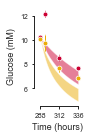

In [8]:
# Plot glucose prediction Hypothesis 1 and dose A

plt.close('all')

fig = sns.FacetGrid(data=predictionChip14, hue="Glycemic_level", palette=customPalette,
                    sharex=True, sharey=True,
                    height=FIGURE_HEIGHT, aspect=(FIGURE_WIDTH/6)/FIGURE_HEIGHT)

#fig.map(plt.errorbar, "time_total", "Glucose_mean", "Glucose_SEM", fmt='none')
fig.map(plt.errorbar, "time_total", "Glucose_mean", "Glucose_SEM", fmt='none', elinewidth=1, capsize=0.5, capthick=0.3)
sns.lineplot(data=predictionChip14,
             x='time_total', y='Glucose_mean', hue="Glycemic_level", marker='o', err_style='bars',
             color=customPalette, linewidth=0, ci=95, ax=fig.ax, legend=None)# overlay the simulated
fig.ax.fill_between(data=predictionsChip14Hyper, x='time_total', y1='H1_G_min', y2='H1_G_max', alpha=0.5, 
                    facecolor=colors[0])
fig.ax.fill_between(data=predictionsChip14Normo, x='time_total', y1='H1_G_min', y2='H1_G_max', alpha=0.5, 
                    facecolor=colors[1])

fig.set_axis_labels('Time (hours)', 'Glucose (mM)')
fig.ax.set_xticks([288,312,336])
fig.ax.set_xlim(280,340)
fig.despine(trim=True)
plt.tight_layout(w_pad=-0.1)
fig.savefig(os.path.join(figpath, "predictionGlucoseH1.pdf"))



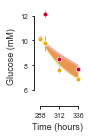

In [9]:
# Plot glucose prediction Hypothesis 2

plt.close('all')

fig = sns.FacetGrid(data=predictionChip14, hue="Glycemic_level", palette=customPalette,
                    sharex=True, sharey=True,
                    height=FIGURE_HEIGHT, aspect=(FIGURE_WIDTH/6)/FIGURE_HEIGHT)

#fig.map(plt.errorbar, "time_total", "Glucose_mean", "Glucose_SEM", fmt='none')
fig.map(plt.errorbar, "time_total", "Glucose_mean", "Glucose_SEM", fmt='none', elinewidth=1, capsize=0.5, capthick=0.3)
sns.lineplot(data=predictionChip14,
             x='time_total', y='Glucose_mean', hue="Glycemic_level", marker='o', err_style='bars',
             color=customPalette, linewidth=0, ci=95, ax=fig.ax, legend=None)# overlay the simulated
fig.ax.fill_between(data=predictionsChip14Hyper, x='time_total', y1='H2_G_min', y2='H2_G_max', alpha=0.5, 
                    facecolor=colors[0])
fig.ax.fill_between(data=predictionsChip14Normo, x='time_total', y1='H2_G_min', y2='H2_G_max', alpha=0.5, 
                    facecolor=colors[1])

fig.set_axis_labels('Time (hours)', 'Glucose (mM)')
fig.ax.set_xticks([288,312,336])
fig.ax.set_xlim(280,340)
fig.despine(trim=True)
plt.tight_layout(w_pad=-0.1)
fig.savefig(os.path.join(figpath, "predictionGlucoseH2.pdf"))
